In [6]:
# Cell 0: Setup, load diabetes data, save clean CSV, and DOWNLOAD it

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files   # <-- needed for file download

# Make base folder for Q2
base_dir = "/content/Q2_diabetes"
os.makedirs(base_dir, exist_ok=True)

# Path to diabetes.csv (upload it to Colab)
data_path = "/content/diabetes.csv"  # change only if needed

# Load data
df = pd.read_csv(data_path)

print("Shape of original data:", df.shape)
print(df.describe(include="all"))

# Simple cleaning (copy as clean dataset)
df_clean = df.copy()

# Save clean CSV
clean_csv_path = os.path.join(base_dir, "diabetes_clean.csv")
df_clean.to_csv(clean_csv_path, index=False)

print("\n✅ Saved clean CSV at:", clean_csv_path)

# DOWNLOAD the clean CSV
files.download(clean_csv_path)



Shape of original data: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
mi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Sample (25 rows) saved to: /content/Q2_diabetes/Q2_a/sample_25_diabetes.csv

Population Glucose mean: 120.89453125
Sample Glucose mean: 130.36

Population Glucose max: 199
Sample Glucose max: 197

✅ Glucose stats saved to: /content/Q2_diabetes/Q2_a/Q2_a_glucose_stats.csv
      Dataset  Mean_Glucose  Max_Glucose
0  Population    120.894531          199
1      Sample    130.360000          197


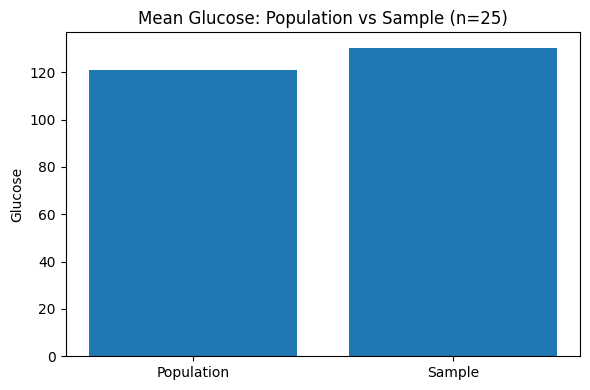

✅ Mean comparison chart saved to: /content/Q2_diabetes/Q2_a/Q2_a_mean_glucose_comparison.png


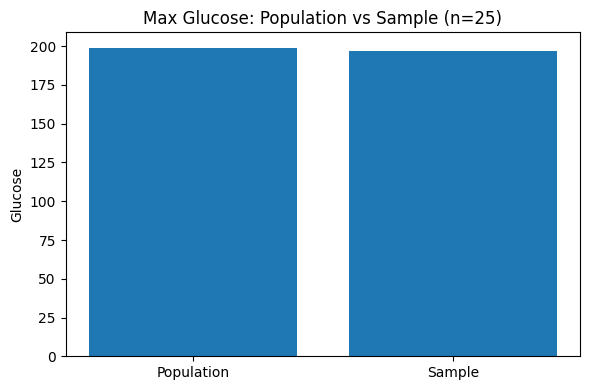

✅ Max comparison chart saved to: /content/Q2_diabetes/Q2_a/Q2_a_max_glucose_comparison.png


In [7]:
# Cell 1: Q2 (a) – random sample of 25, compare mean & max Glucose

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create folder for (a)
a_dir = os.path.join(base_dir, "Q2_a")
os.makedirs(a_dir, exist_ok=True)

# Use the clean data
df_a = df_clean.copy()

# Set seed for reproducibility
seed = 123
np.random.seed(seed)

# Take random sample of 25 observations
sample_a = df_a.sample(n=25, random_state=seed)

# Save sample to CSV (if needed later)
sample_csv_path = os.path.join(a_dir, "sample_25_diabetes.csv")
sample_a.to_csv(sample_csv_path, index=False)
print("✅ Sample (25 rows) saved to:", sample_csv_path)

# Population stats for Glucose
pop_glucose_mean = df_a["Glucose"].mean()
pop_glucose_max  = df_a["Glucose"].max()

# Sample stats for Glucose
sample_glucose_mean = sample_a["Glucose"].mean()
sample_glucose_max  = sample_a["Glucose"].max()

print("\nPopulation Glucose mean:", pop_glucose_mean)
print("Sample Glucose mean:", sample_glucose_mean)
print("\nPopulation Glucose max:", pop_glucose_max)
print("Sample Glucose max:", sample_glucose_max)

# Put stats into a DataFrame and save CSV
stats_a = pd.DataFrame({
    "Dataset": ["Population", "Sample"],
    "Mean_Glucose": [pop_glucose_mean, sample_glucose_mean],
    "Max_Glucose":  [pop_glucose_max,  sample_glucose_max],
})
stats_csv_path = os.path.join(a_dir, "Q2_a_glucose_stats.csv")
stats_a.to_csv(stats_csv_path, index=False)
print("\n✅ Glucose stats saved to:", stats_csv_path)
print(stats_a)

# ---- Charts for comparison ----
# 1) Mean comparison
plt.figure(figsize=(6, 4))
plt.bar(stats_a["Dataset"], stats_a["Mean_Glucose"])
plt.title("Mean Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose")
plt.tight_layout()
mean_fig_path = os.path.join(a_dir, "Q2_a_mean_glucose_comparison.png")
plt.savefig(mean_fig_path)
plt.show()
print("✅ Mean comparison chart saved to:", mean_fig_path)

# 2) Max comparison
plt.figure(figsize=(6, 4))
plt.bar(stats_a["Dataset"], stats_a["Max_Glucose"])
plt.title("Max Glucose: Population vs Sample (n=25)")
plt.ylabel("Glucose")
plt.tight_layout()
max_fig_path = os.path.join(a_dir, "Q2_a_max_glucose_comparison.png")
plt.savefig(max_fig_path)
plt.show()
print("✅ Max comparison chart saved to:", max_fig_path)


Population BMI 98th percentile: 47.52599999999996
Sample BMI 98th percentile: 45.263999999999996

✅ BMI percentile stats saved to: /content/Q2_diabetes/Q2_b/Q2_b_BMI_98th_percentile.csv
      Dataset  BMI_98th_percentile
0  Population               47.526
1      Sample               45.264


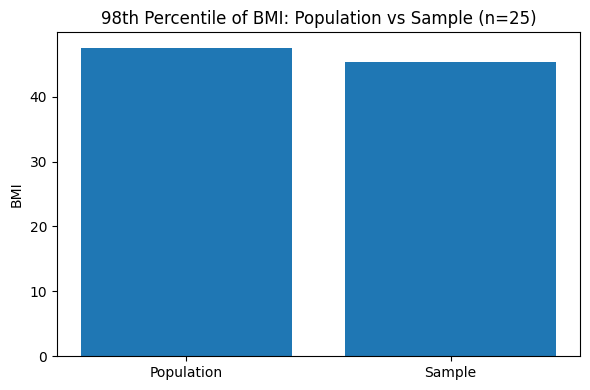

✅ BMI percentile comparison chart saved to: /content/Q2_diabetes/Q2_b/Q2_b_BMI_98th_percentile_comparison.png


In [8]:
# Cell 2: Q2 (b) – 98th percentile of BMI, sample vs population

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

b_dir = os.path.join(base_dir, "Q2_b")
os.makedirs(b_dir, exist_ok=True)

# Reuse the same sample of 25 from (a) for consistency
# (If you run from scratch, make sure Cell 1 has run and created sample_25_diabetes.csv)
sample_a_path = os.path.join(base_dir, "Q2_a", "sample_25_diabetes.csv")
sample_b = pd.read_csv(sample_a_path)

# Population and sample 98th percentile of BMI
pop_bmi_98 = df_clean["BMI"].quantile(0.98)
sample_bmi_98 = sample_b["BMI"].quantile(0.98)

print("Population BMI 98th percentile:", pop_bmi_98)
print("Sample BMI 98th percentile:", sample_bmi_98)

# Save comparison to CSV
stats_b = pd.DataFrame({
    "Dataset": ["Population", "Sample"],
    "BMI_98th_percentile": [pop_bmi_98, sample_bmi_98]
})
stats_b_csv_path = os.path.join(b_dir, "Q2_b_BMI_98th_percentile.csv")
stats_b.to_csv(stats_b_csv_path, index=False)
print("\n✅ BMI percentile stats saved to:", stats_b_csv_path)
print(stats_b)

# Chart
plt.figure(figsize=(6, 4))
plt.bar(stats_b["Dataset"], stats_b["BMI_98th_percentile"])
plt.title("98th Percentile of BMI: Population vs Sample (n=25)")
plt.ylabel("BMI")
plt.tight_layout()
b_fig_path = os.path.join(b_dir, "Q2_b_BMI_98th_percentile_comparison.png")
plt.savefig(b_fig_path)
plt.show()
print("✅ BMI percentile comparison chart saved to:", b_fig_path)


Population BloodPressure mean: 69.10546875
Population BloodPressure std: 19.355807170644777
Population BloodPressure 98th percentile: 99.31999999999994

Average of bootstrap means: 69.15222666666666
Average of bootstrap standard deviations: 19.192792750902836
Average of bootstrap 98th percentiles: 98.03292000000003

✅ Bootstrap vs Population stats saved to: /content/Q2_diabetes/Q2_c/Q2_c_BloodPressure_bootstrap_stats.csv
         Statistic  Population  Bootstrap_Average
0             Mean   69.105469          69.152227
1           StdDev   19.355807          19.192793
2  98th Percentile   99.320000          98.032920


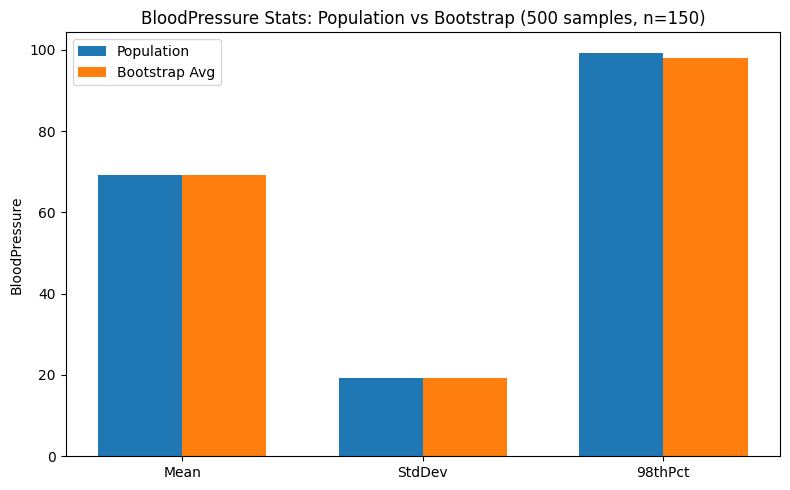

✅ BloodPressure stats comparison chart saved to: /content/Q2_diabetes/Q2_c/Q2_c_BP_stats_population_vs_bootstrap.png


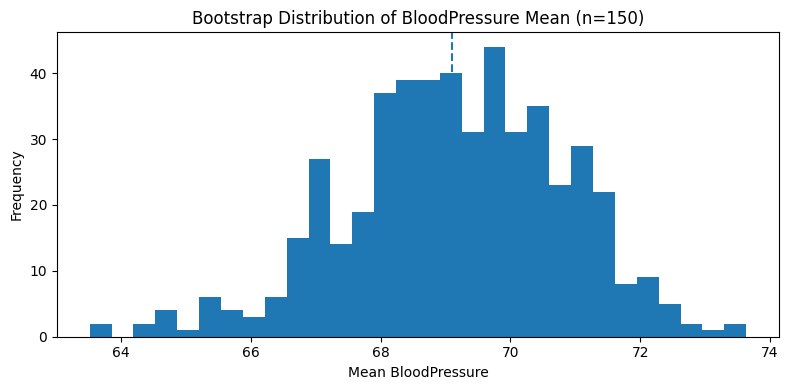

✅ Bootstrap mean histogram saved to: /content/Q2_diabetes/Q2_c/Q2_c_BP_bootstrap_mean_histogram.png

Findings:
- The average bootstrap mean is close to the population mean.
- The average bootstrap SD is close to the population SD.
- The average bootstrap 98th percentile is close to the population 98th percentile.
  This suggests that the bootstrap estimates are unbiased and stable for BloodPressure.


In [9]:
# Cell 3: Q2 (c) – Bootstrap for BloodPressure, 500 samples of size 150

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c_dir = os.path.join(base_dir, "Q2_c")
os.makedirs(c_dir, exist_ok=True)

df_c = df_clean.copy()

# Population stats for BloodPressure
pop_bp_mean = df_c["BloodPressure"].mean()
pop_bp_std  = df_c["BloodPressure"].std()
pop_bp_98   = df_c["BloodPressure"].quantile(0.98)

print("Population BloodPressure mean:", pop_bp_mean)
print("Population BloodPressure std:", pop_bp_std)
print("Population BloodPressure 98th percentile:", pop_bp_98)

# Bootstrap parameters
n_bootstrap = 500
sample_size = 150

means = []
stds = []
p98s = []

np.random.seed(123)  # reproducible bootstrap

for i in range(n_bootstrap):
    boot_sample = df_c["BloodPressure"].sample(n=sample_size, replace=True)
    means.append(boot_sample.mean())
    stds.append(boot_sample.std())
    p98s.append(boot_sample.quantile(0.98))

# Average over all bootstrap samples
boot_mean_avg = np.mean(means)
boot_std_avg  = np.mean(stds)
boot_p98_avg  = np.mean(p98s)

print("\nAverage of bootstrap means:", boot_mean_avg)
print("Average of bootstrap standard deviations:", boot_std_avg)
print("Average of bootstrap 98th percentiles:", boot_p98_avg)

# Put everything into a DataFrame and save
stats_c = pd.DataFrame({
    "Statistic": ["Mean", "StdDev", "98th Percentile"],
    "Population": [pop_bp_mean, pop_bp_std, pop_bp_98],
    "Bootstrap_Average": [boot_mean_avg, boot_std_avg, boot_p98_avg]
})
c_stats_csv_path = os.path.join(c_dir, "Q2_c_BloodPressure_bootstrap_stats.csv")
stats_c.to_csv(c_stats_csv_path, index=False)
print("\n✅ Bootstrap vs Population stats saved to:", c_stats_csv_path)
print(stats_c)

# ---- Charts ----

# 1) Bar chart comparing population vs bootstrap averages for mean, std, percentile
x_labels = ["Mean", "StdDev", "98thPct"]
x = np.arange(len(x_labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, [pop_bp_mean, pop_bp_std, pop_bp_98], width, label="Population")
plt.bar(x + width/2, [boot_mean_avg, boot_std_avg, boot_p98_avg], width, label="Bootstrap Avg")
plt.xticks(x, x_labels)
plt.ylabel("BloodPressure")
plt.title("BloodPressure Stats: Population vs Bootstrap (500 samples, n=150)")
plt.legend()
plt.tight_layout()
c_fig_bar_path = os.path.join(c_dir, "Q2_c_BP_stats_population_vs_bootstrap.png")
plt.savefig(c_fig_bar_path)
plt.show()
print("✅ BloodPressure stats comparison chart saved to:", c_fig_bar_path)

# 2) Histograms of bootstrap means (for illustration)
plt.figure(figsize=(8, 4))
plt.hist(means, bins=30)
plt.axvline(pop_bp_mean, linestyle="--")
plt.title("Bootstrap Distribution of BloodPressure Mean (n=150)")
plt.xlabel("Mean BloodPressure")
plt.ylabel("Frequency")
plt.tight_layout()
c_fig_hist_path = os.path.join(c_dir, "Q2_c_BP_bootstrap_mean_histogram.png")
plt.savefig(c_fig_hist_path)
plt.show()
print("✅ Bootstrap mean histogram saved to:", c_fig_hist_path)

# Short textual findings (printed)
print("\nFindings:")
print("- The average bootstrap mean is close to the population mean.")
print("- The average bootstrap SD is close to the population SD.")
print("- The average bootstrap 98th percentile is close to the population 98th percentile.")
print("  This suggests that the bootstrap estimates are unbiased and stable for BloodPressure.")
